In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score



In [2]:
data_extraTrees = pd.read_csv('/home/cid34senhas/Desktop/DAATP/Entrega/2_data_ExtraTrees.csv')

In [5]:
def plot_confusion_matrix_with_labels(confusion_matrix, label_mapping):
    # Criar um mapeamento inverso
    reverse_label_mapping = {v: k for k, v in label_mapping.items()}
    
    # Aplicar o mapeamento inverso na matriz de confusão
    cm_with_labels = np.zeros_like(confusion_matrix, dtype=object)
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            cm_with_labels[i, j] = f"{reverse_label_mapping[i]} (Pred: {reverse_label_mapping[j]})"

    # Criar um DataFrame para facilitar a visualização
    df_cm = pd.DataFrame(confusion_matrix, index=reverse_label_mapping.values(), columns=reverse_label_mapping.values())
    
    # Plotar a matriz de confusão
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix with Labels')
    plt.show()
label_mapping = {
    'CN-CN': 0,
    'AD-AD': 1,
    'MCI-AD': 2,
    'MCI-MCI': 3,
    'CN-MCI' : 4
}

In [4]:
X = data_extraTrees.drop(['Transition'], axis= 1)
y = data_extraTrees['Transition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=34, stratify=y)


              precision    recall  f1-score   support

           0       0.58      0.88      0.70        24
           1       0.67      0.53      0.59        15
           2       0.31      0.29      0.30        17
           3       0.31      0.22      0.26        18
           4       0.00      0.00      0.00         3

    accuracy                           0.49        77
   macro avg       0.37      0.38      0.37        77
weighted avg       0.45      0.49      0.46        77



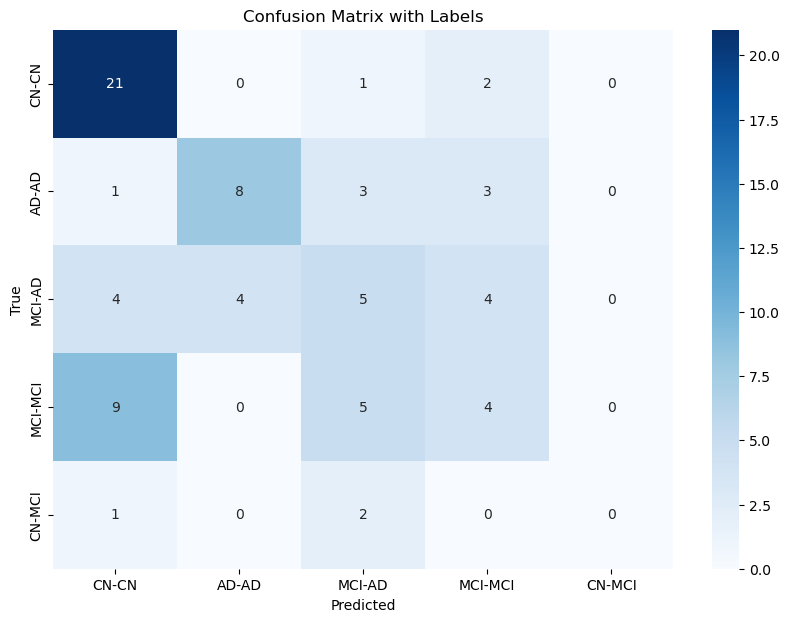

In [5]:
et_model_score = ExtraTreesClassifier(criterion='gini', max_depth=20, random_state=34)


et_model_score.fit(X_train, y_train)
et_pred = et_model_score.predict(X_test)
print(classification_report(y_test,et_pred,zero_division=0))
cm = confusion_matrix(y_test,et_pred)
plot_confusion_matrix_with_labels(cm, label_mapping)


In [6]:
extra_score = cross_val_score(et_model_score, X, y, cv=5,scoring='f1_macro')

print(f"Cross Validation Score: {extra_score}")
print(f"Cross Validation Score Média: {extra_score.mean()}")
print(f"Cross Validation Score STD: {extra_score.std()}")

Cross Validation Score: [0.36298438 0.31348399 0.23147186 0.35909823 0.30759878]
Cross Validation Score Média: 0.31492745024905877
Cross Validation Score STD: 0.047499799503368925


## Aplicar Normalização 

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_norm = data_extraTrees.drop(['Transition'], axis= 1)
y_norm = data_extraTrees['Transition']
X_norm = scaler.fit_transform(X_train_norm)


X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.25, random_state=34, stratify=y)


              precision    recall  f1-score   support

           0       0.58      0.88      0.70        24
           1       0.69      0.73      0.71        15
           2       0.46      0.35      0.40        17
           3       0.33      0.22      0.27        18
           4       0.00      0.00      0.00         3

    accuracy                           0.55        77
   macro avg       0.41      0.44      0.42        77
weighted avg       0.50      0.55      0.51        77



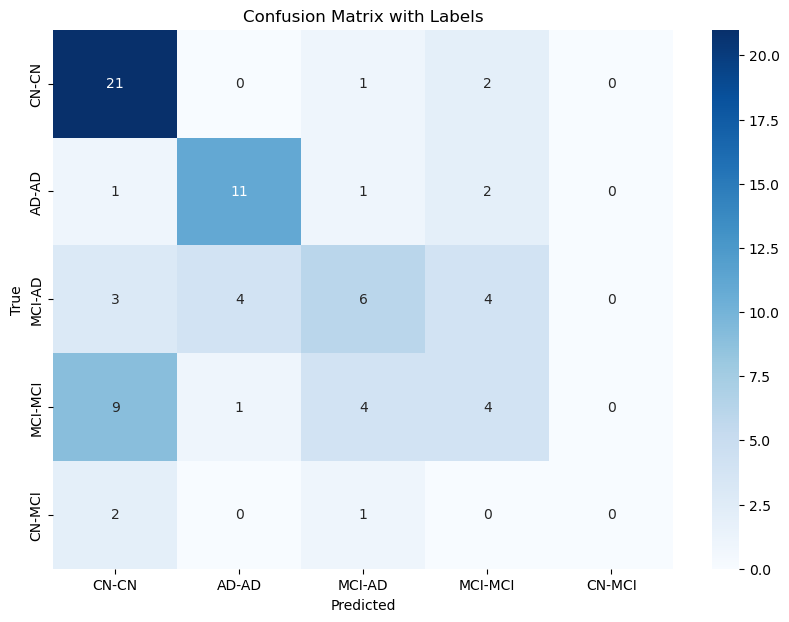

In [8]:
et_model_normalizado = ExtraTreesClassifier(criterion='gini', max_depth=20, random_state=34)


et_model_normalizado.fit(X_train, y_train)
et_pred = et_model_normalizado.predict(X_test)
print(classification_report(y_test,et_pred,zero_division=0))
cm = confusion_matrix(y_test,et_pred)
plot_confusion_matrix_with_labels(cm, label_mapping)

In [9]:
extra_score_norm = cross_val_score(et_model_normalizado, X_norm, y_norm, cv=5,scoring='f1_macro')

print(f"Cross Validation Score: {extra_score_norm}")
print(f"Cross Validation Score Média: {extra_score_norm.mean()}")
print(f"Cross Validation Score STD: {extra_score_norm.std()}")

Cross Validation Score: [0.37341991 0.28310892 0.27478261 0.37907023 0.32827329]
Cross Validation Score Média: 0.32773099370918757
Cross Validation Score STD: 0.04363060788682079


## SMOTE

Y Train Values:
Transition
0    72
3    53
2    51
1    45
4     7
Name: count, dtype: int64
Y Train Values:
Transition
2    72
1    72
3    72
0    72
4    72
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.57      0.83      0.68        24
           1       0.42      0.53      0.47        15
           2       0.12      0.12      0.12        17
           3       0.17      0.06      0.08        18
           4       0.00      0.00      0.00         3

    accuracy                           0.40        77
   macro avg       0.26      0.31      0.27        77
weighted avg       0.33      0.40      0.35        77



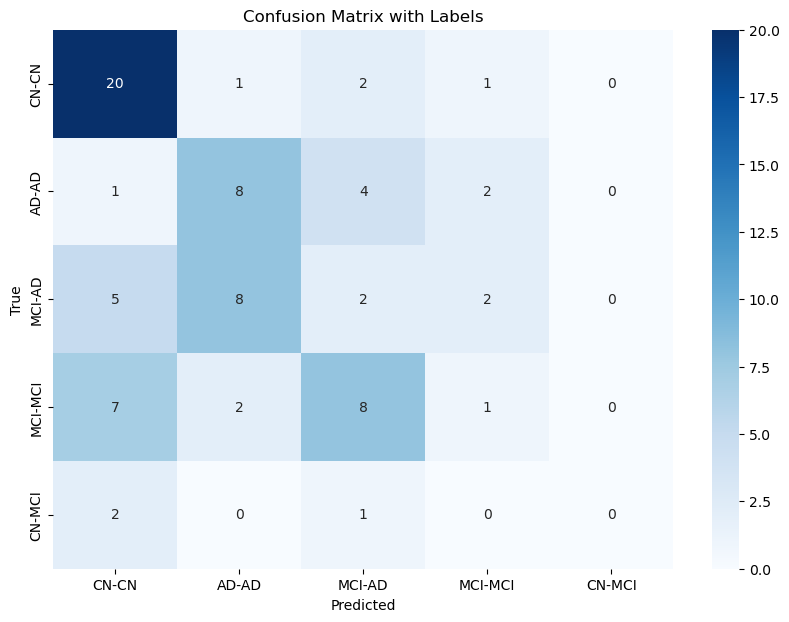

In [6]:
data_extraTrees_norm = pd.read_csv('/home/cid34senhas/Desktop/DAATP/Entrega/6_data_extratrees_norm.csv')

X_norm = data_extraTrees_norm.drop(['Transition'], axis= 1)
y_norm = data_extraTrees_norm['Transition']


X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.25, random_state=34, stratify=y_norm)

et_model_normalizado = ExtraTreesClassifier(criterion='gini', max_depth=20, random_state=34)

print("Y Train Values:")
print(y_train.value_counts())


smote = SMOTE(sampling_strategy="auto", random_state=34)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Y Train Values:")
print(y_train_smote.value_counts())


et_model_normalizado.fit(X_train_smote, y_train_smote)
et_pred = et_model_normalizado.predict(X_test)
print(classification_report(y_test, et_pred,zero_division=0))
cm = confusion_matrix(y_test, et_pred)
plot_confusion_matrix_with_labels(cm,label_mapping)



In [10]:
et_score_smote = cross_val_score(et_model_normalizado, X_norm, y_norm, cv=5,scoring='f1_macro')

print(f"Cross Validation Score: {et_score_smote}")
print(f"Cross Validation Score Média: {et_score_smote.mean()}")
print(f"Cross Validation Score STD: {et_score_smote.std()}")

Cross Validation Score: [0.37341991 0.28310892 0.27478261 0.37907023 0.32827329]
Cross Validation Score Média: 0.32773099370918757
Cross Validation Score STD: 0.04363060788682079


Como esperado, a introdução não trouxe beneficios ao nosso modelo, pois a criação de dados sinteticos a partir de dados biologicos é muito complexa e normalmente cria ruido.

Isto é notorio por uma diminuição das classes minoritarias, como AD-AD, MCI-MCI e MCI-AD


Número de features por intervalo de importância:
Entre 0.012 e inf: 0
Entre 0.010 e 0.012: 0
Entre 0.008 e 0.010: 0
Entre 0.006 e 0.008: 0
Entre 0.004 e 0.006: 6
Entre 0.002 e 0.004: 85
Entre 0.000 e 0.002: 720


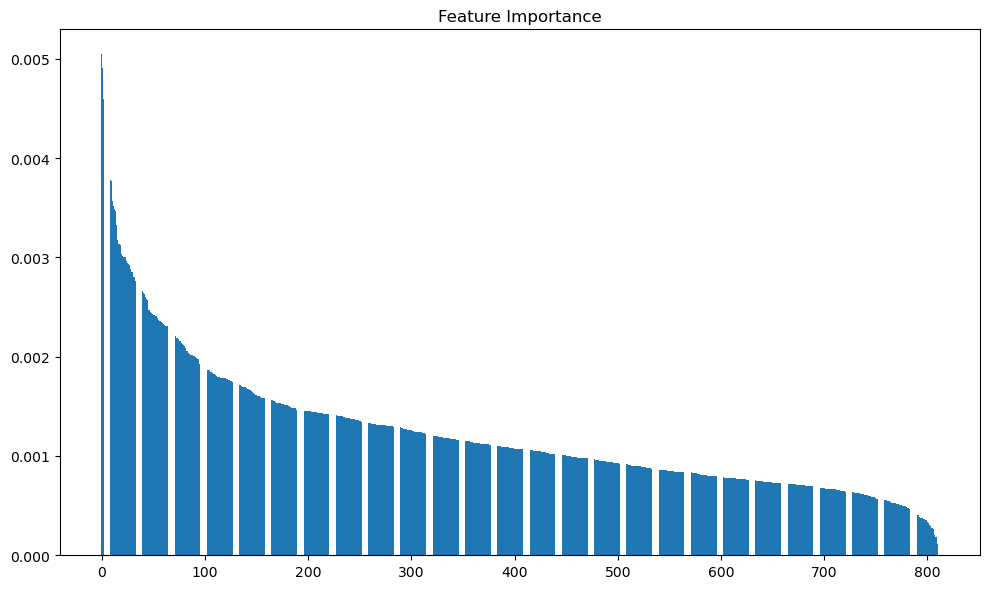

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def feature_importance(model, X_train):

    # Obter as importâncias das features
    importances = model.feature_importances_

    # Exibir os intervalos de importância
    thresholds = [(0.012, float('inf')), (0.010, 0.012), (0.008, 0.010), 
                  (0.006, 0.008), (0.004, 0.006), (0.002, 0.004), (0, 0.002)]
    
    print("\nNúmero de features por intervalo de importância:")
    for low, high in thresholds:
        count = np.sum((importances > low) & (importances <= high))
        print(f"Entre {low:.3f} e {high:.3f}: {count}")

    # Ordenar as importâncias em ordem decrescente
    indices = np.argsort(importances)[::-1]

    # Criar o gráfico
    plt.figure(figsize=(10, 6))
    plt.title("Feature Importance")
    
    # Adicionar barras
    plt.bar(range(X_train.shape[1]), importances[indices])

    # Exibir o gráfico
    plt.tight_layout()
    plt.show()



feature_importance(et_model_normalizado,X_train)


--- Avaliando com threshold: 0.004 ---
              precision    recall  f1-score   support

           0       0.50      0.58      0.54        24
           1       0.33      0.40      0.36        15
           2       0.27      0.18      0.21        17
           3       0.25      0.28      0.26        18
           4       0.00      0.00      0.00         3

    accuracy                           0.36        77
   macro avg       0.27      0.29      0.28        77
weighted avg       0.34      0.36      0.35        77



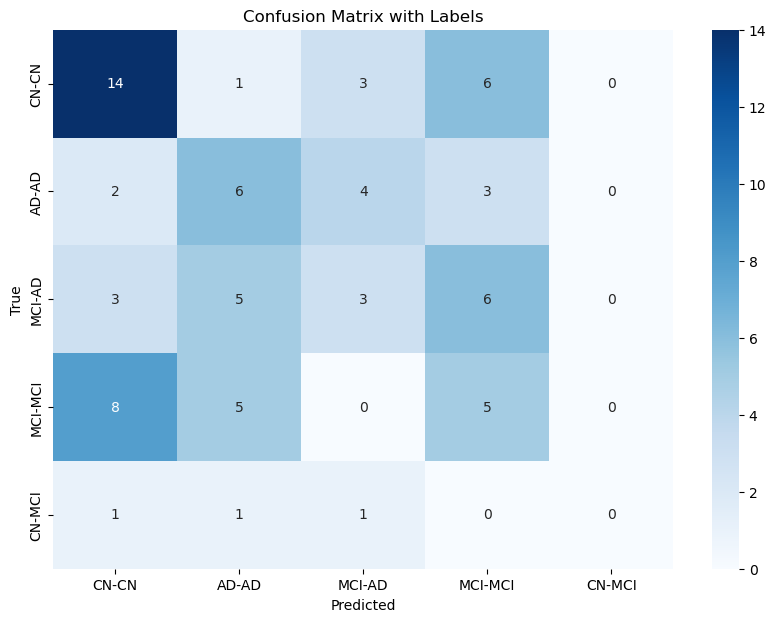

Cross Validation Score: [0.35498498 0.26754386 0.3702381  0.2317193  0.31649123]
Cross Validation Score Média: 0.3081954932375985
Cross Validation Score STD: 0.05216996057358477

--- Avaliando com threshold: 0.002 ---
              precision    recall  f1-score   support

           0       0.57      0.67      0.62        24
           1       0.62      0.53      0.57        15
           2       0.30      0.35      0.32        17
           3       0.38      0.33      0.35        18
           4       0.00      0.00      0.00         3

    accuracy                           0.47        77
   macro avg       0.37      0.38      0.37        77
weighted avg       0.45      0.47      0.46        77



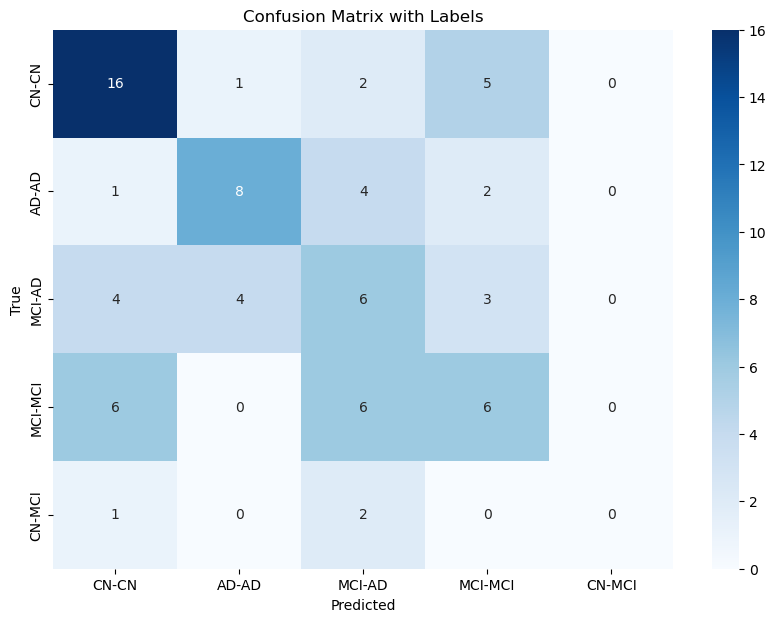

Cross Validation Score: [0.35498498 0.26754386 0.3702381  0.2317193  0.31649123]
Cross Validation Score Média: 0.3081954932375985
Cross Validation Score STD: 0.05216996057358477


In [13]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np


def evaluate_model_with_thresholds(model, X_train, X_test, y_train, y_test, thresholds, label_mapping,X,y):
    """
    Avalia o modelo RandomForestClassifier alterando o threshold para seleção de features.

    Parâmetros:
        model: O modelo RandomForestClassifier a ser utilizado.
        X_train: Conjunto de treinamento.
        X_test: Conjunto de teste.
        y_train: Labels do conjunto de treinamento.
        y_test: Labels do conjunto de teste.
        thresholds: Lista de thresholds para seleção de features.
        label_mapping: Mapeamento de rótulos para a matriz de confusão.
    """
    for threshold in thresholds:
        print(f"\n--- Avaliando com threshold: {threshold} ---")

        # Criar objeto SelectFromModel com o threshold atual
        sfm = SelectFromModel(model, threshold=threshold)

        # Selecionar as features mais importantes
        X_important_train = sfm.fit_transform(X_train, y_train)
        X_important_test = sfm.transform(X_test)

        # Treinar o modelo com as features selecionadas
        model.fit(X_important_train, y_train)
        
        # Fazer previsões
        y_pred = model.predict(X_important_test)

        # Imprimir relatório de classificação
        print(classification_report(y_test, y_pred, zero_division=0))

        # Calcular e plotar matriz de confusão
        cm = confusion_matrix(y_test, y_pred)
        plot_confusion_matrix_with_labels(cm, label_mapping)

        # Cross-validation no conjunto original
        rf_score_norm = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')

        # Exibir resultados de validação cruzada
        print(f"Cross Validation Score: {rf_score_norm}")
        print(f"Cross Validation Score Média: {rf_score_norm.mean()}")
        print(f"Cross Validation Score STD: {rf_score_norm.std()}")

# Exemplo de uso
et_model_normalizado = ExtraTreesClassifier(criterion='gini', max_depth=20, random_state=34)
thresholds = [0.004, 0.002]

# Substitua pelas suas variáveis reais de X_train, X_test, y_train, y_test e label_mapping
evaluate_model_with_thresholds(et_model_normalizado, X_train, X_test, y_train, y_test, thresholds, label_mapping,X_norm,y_norm)


Analisando os resultados obtidos percebemos que remover colunas pela feature importance tem um impacto negativo no nosso modelo, logo não a vamos utilizar 